In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([0.028, 0.182, 0.257, 0.505, 0.650, 0.665, 0.750, 0.852, 0.879, 0.988])
Y = np.array([1.022, 1.310, 1.115, 1.269, 1.369, 1.395, 1.476, 1.466, 1.406, 1.429])

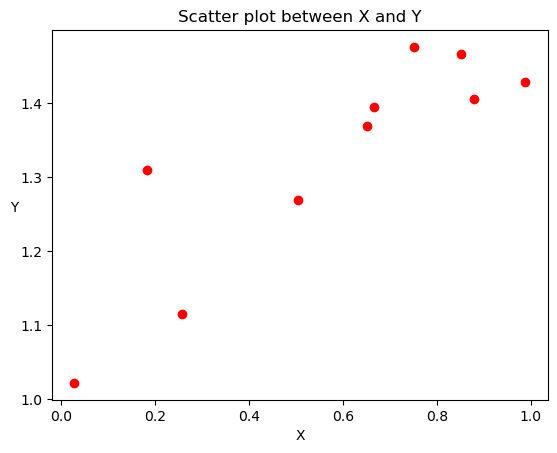

In [4]:
plt.scatter(X, Y, color = 'r')
plt.xlabel('X')
plt.ylabel('Y', rotation = True)
plt.title('Scatter plot between X and Y')
plt.show()

Our goal is to fit a perfect line to predict the output.
The line is $Y$ = $W$$X$.

To find $W$, by using MLE,

We get w = ($XX^{T})^{-1}$$X^{T}y$

In [5]:
X0 = np.ones(len(X))

In [6]:
X1 = np.column_stack((X0, X)) 

In [7]:
m1 = np.linalg.inv(np.matmul(X1.T, X1))

In [8]:
m2 = np.matmul(m1, X1.T)

In [9]:
w = np.matmul(m2, Y)

In [10]:
w

array([1.09089003, 0.4079395 ])

In [11]:
w.shape

(2,)

In [12]:
y_pred = X1.dot(w)

In [13]:
y_pred

array([1.10231233, 1.16513501, 1.19573048, 1.29689947, 1.3560507 ,
       1.36216979, 1.39684465, 1.43845448, 1.44946884, 1.49393425])

Text(0.5, 1.0, 'Linear Regression Plot')

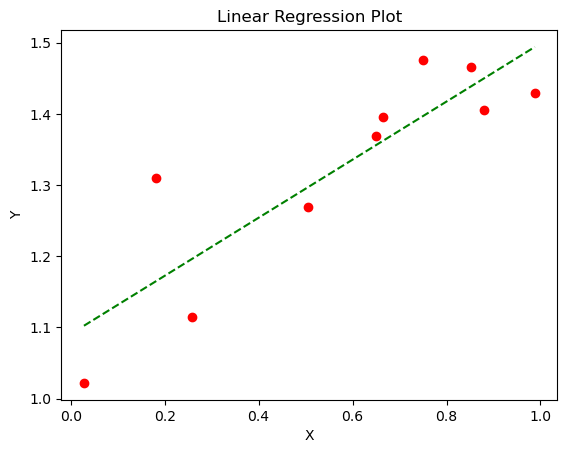

In [14]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, y_pred, color = 'green', linestyle = '--', label = 'h(X)=1.091 + 0.408x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Plot')

In [15]:
RSS = np.sum((y_pred - Y) ** 2)

In [16]:
TSS = np.sum((Y.mean() - Y) ** 2)

In [17]:
R2_score = 1 - (RSS/TSS)

In [18]:
print(f'RSS value = {RSS}, TSS value = {TSS}, R^2 = {R2_score}')

RSS value = 0.04910755461892992, TSS value = 0.20616009999999996, R^2 = 0.7617989386941026


In [19]:
mse = np.mean((y_pred - Y) ** 2)

In [20]:
print(f'Mean Squared Error {mse}')

Mean Squared Error 0.004910755461892992


# Simple Gradient Descent

The first approach is suitable when dealing with a small number of instances. However, in cases with a large number of instances, its complexity becomes considerably expensive. To overcome this challenge, the second approach, Gradient Descent, is employed.

Compute the residual error, as given by the cost function $J(\theta)$

$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (h(w, x)^{(i)} - y^{(i)})^2 $

where $y^{(i)} =   h^{(i)}(w, X) =   [1 , X] w$


In [21]:
def GradientDescent(X, Y, eta, m, n):
    w0, w1 = 0, 0
    w0_list, w1_list, error_list = [], [], []

    for i in range(m):
        h = w1 * X + w0
        loss = np.mean((Y - h) ** 2)/2
    
        dw0 = -(2 * np.sum(Y - h))/n
        dw1 = -(2*(X.T).dot(Y - h))/n
    
        w0 = w0 - eta*dw0
        w1 = w1 - eta*dw1
    
        w0_list.append(w0)
        w1_list.append(w1)
        error_list.append(loss)
        
    mean_square_error = np.mean((Y - h) ** 2)

    return w0_list, w1_list, error_list, w0, w1, mean_square_error

In [22]:
w0_list, w1_list, error_list, W0, W1, mean_squared_error = GradientDescent(X, Y, 0.01, 5000, len(Y))

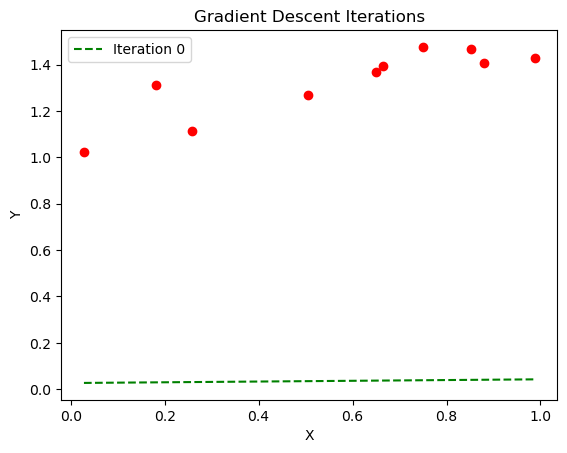

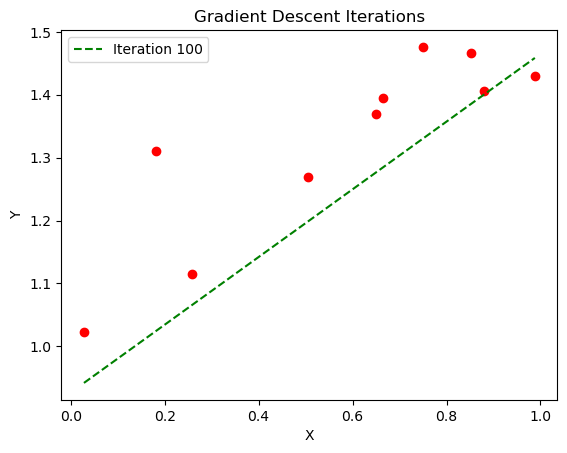

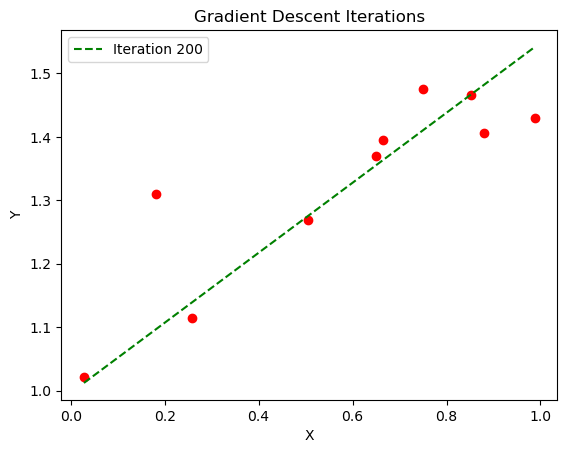

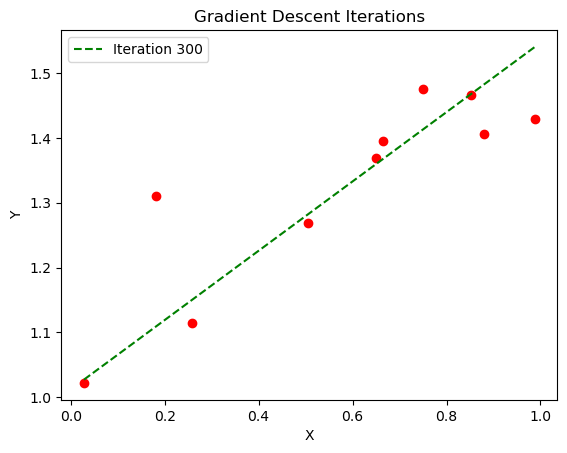

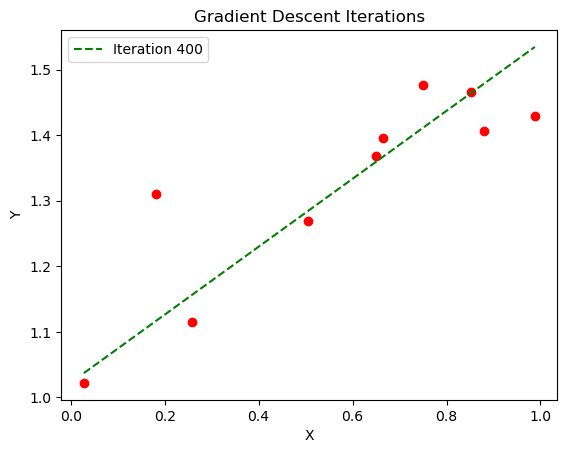

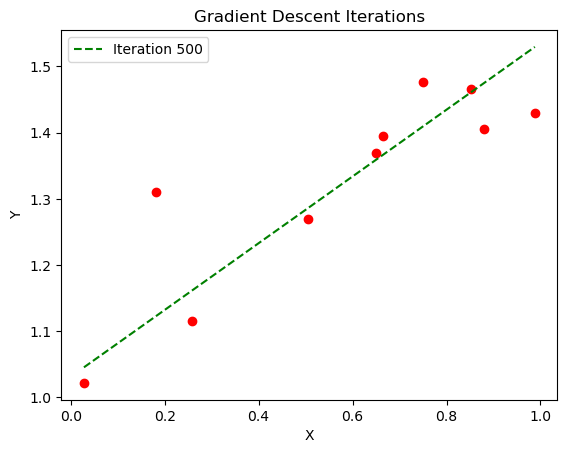

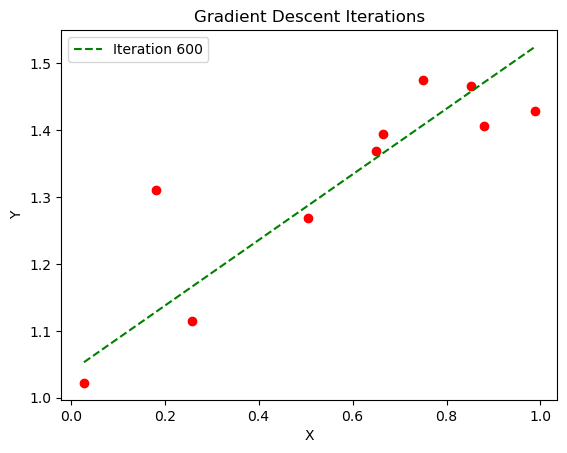

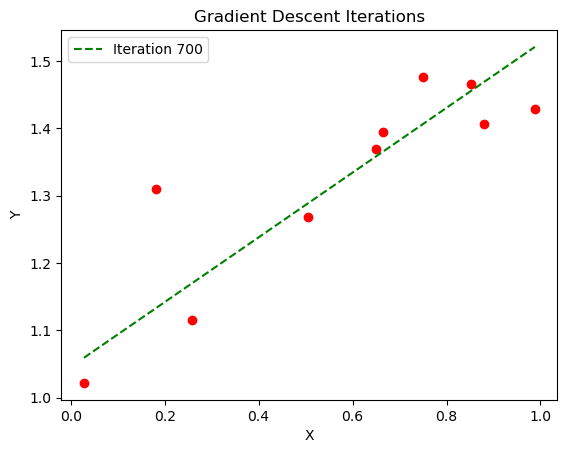

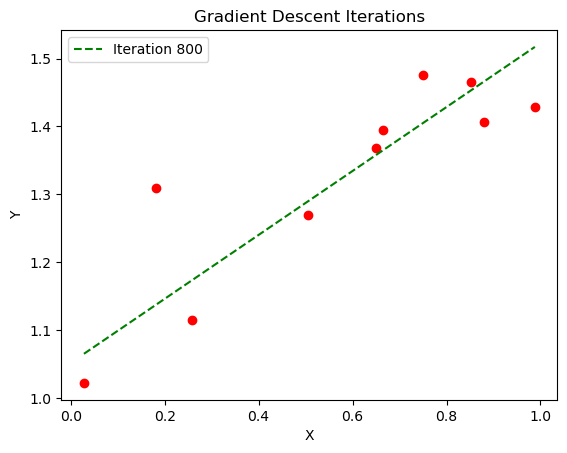

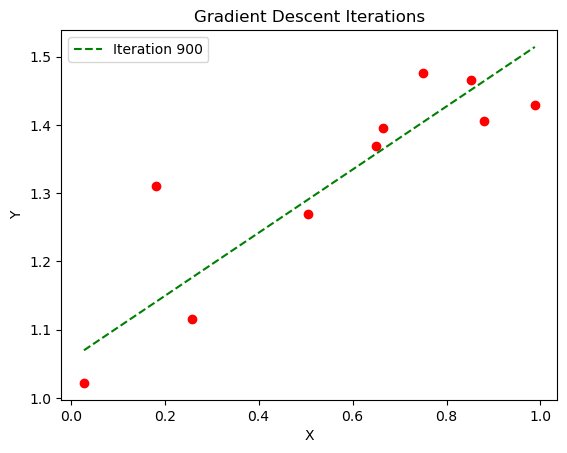

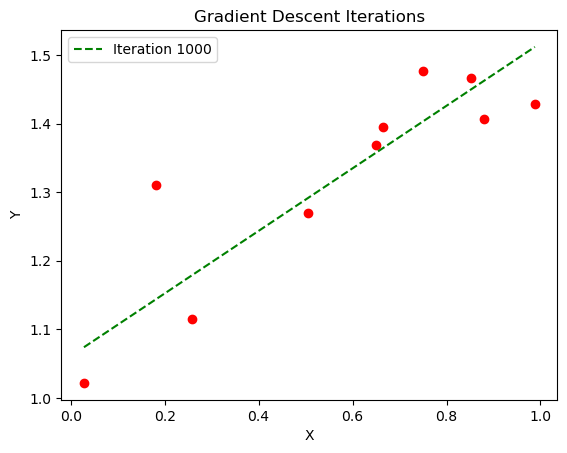

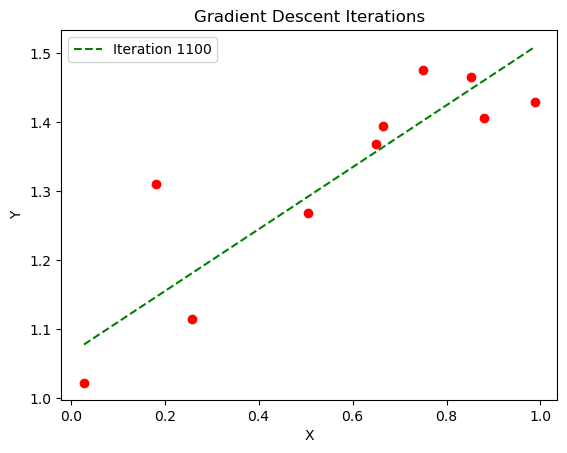

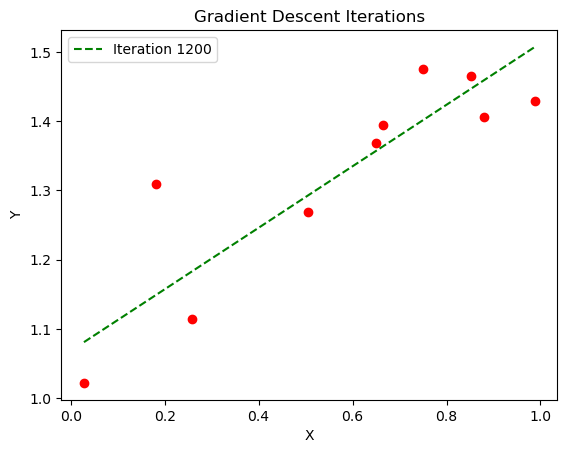

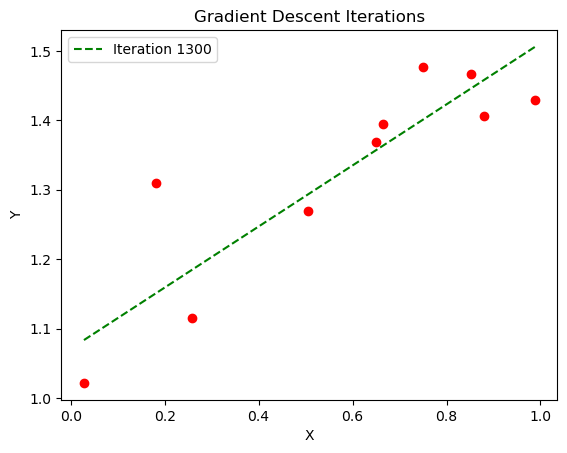

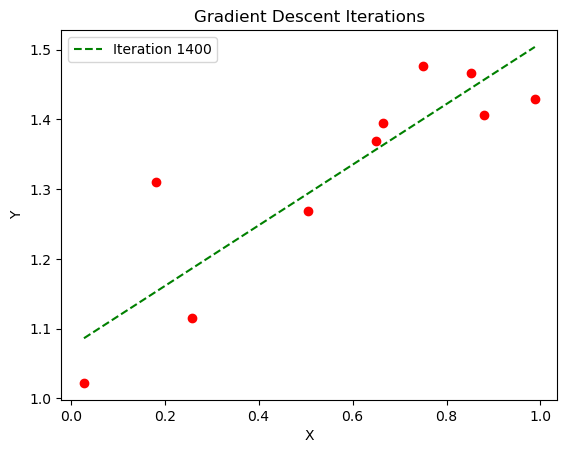

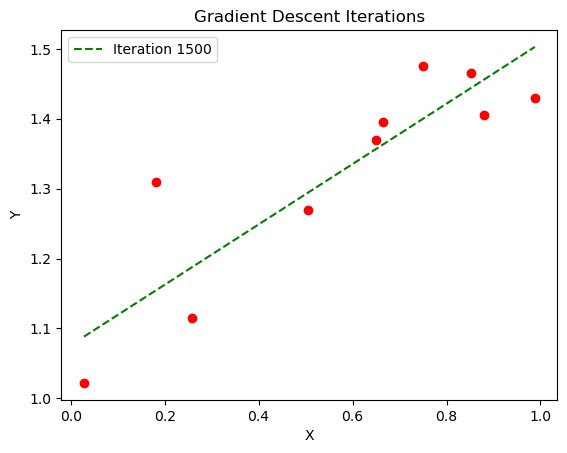

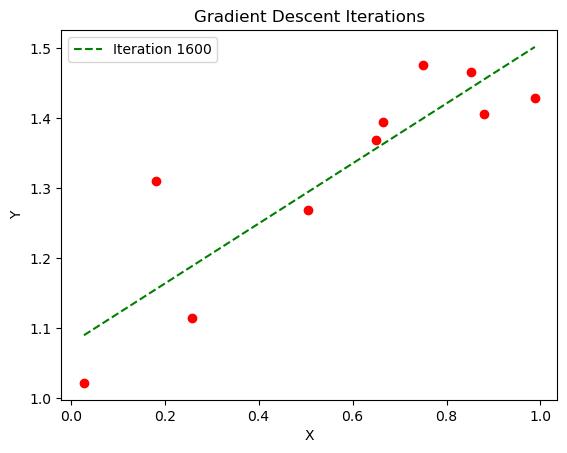

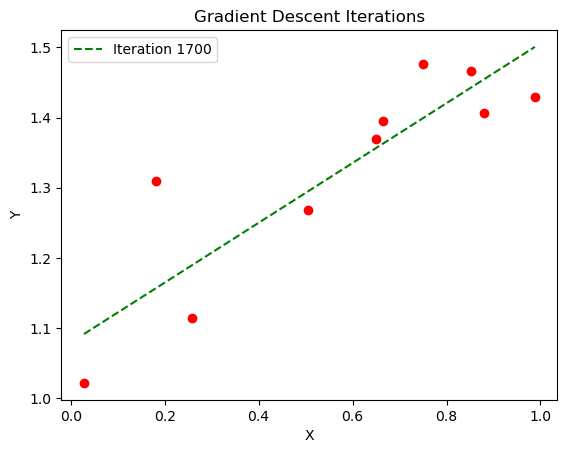

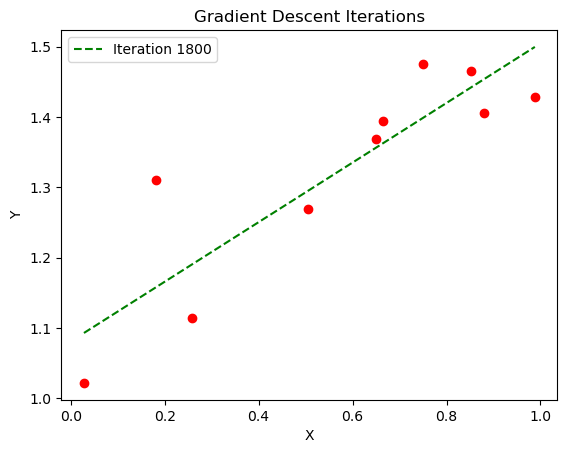

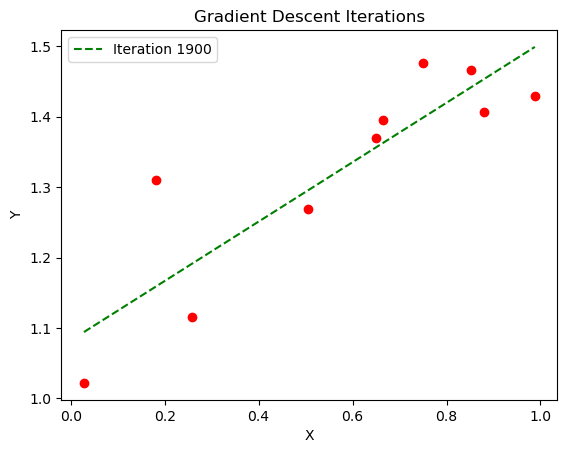

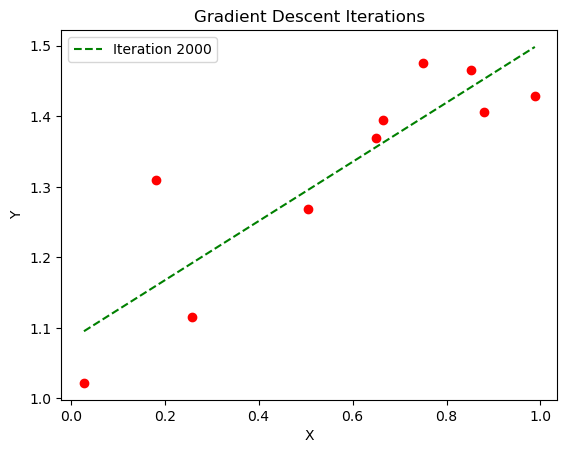

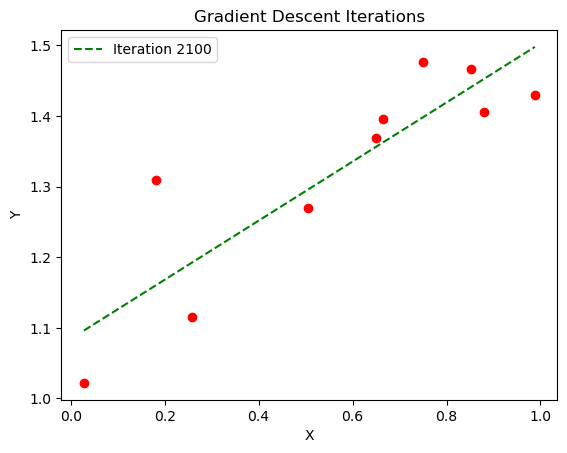

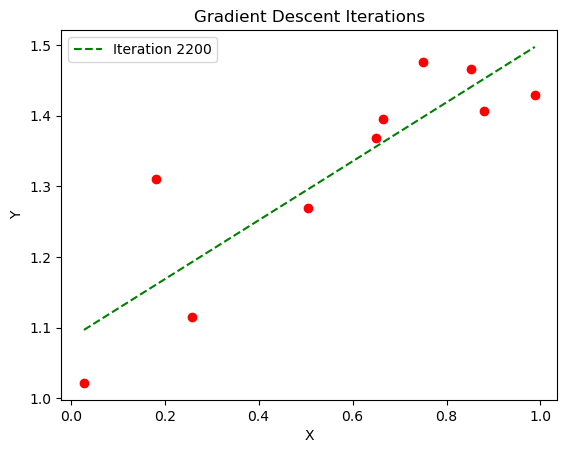

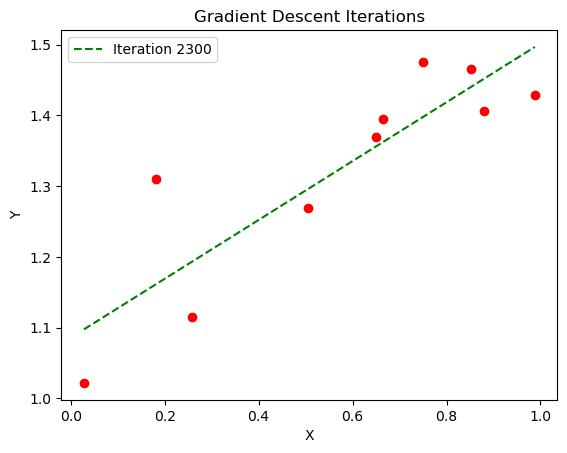

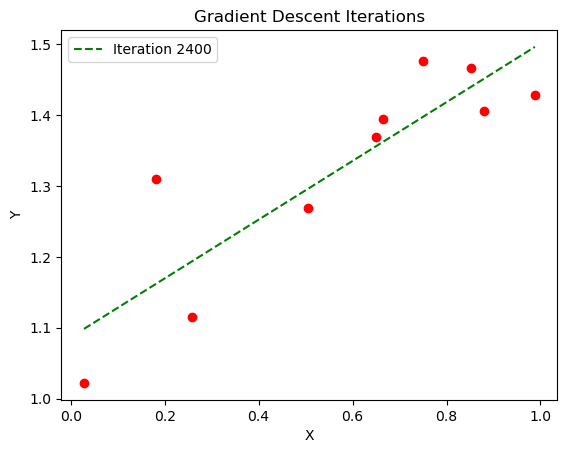

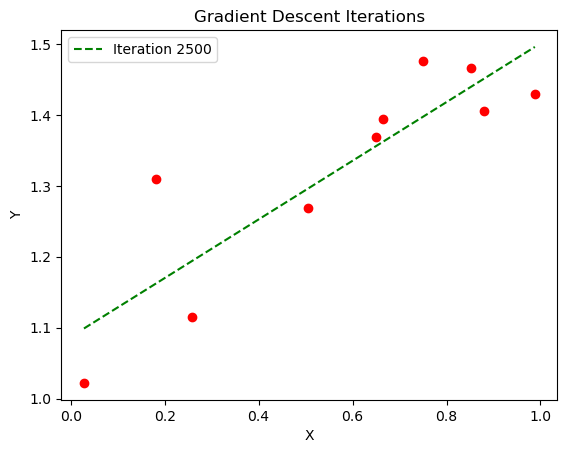

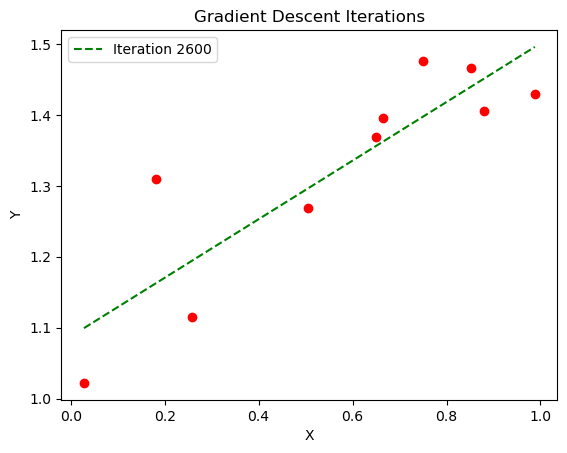

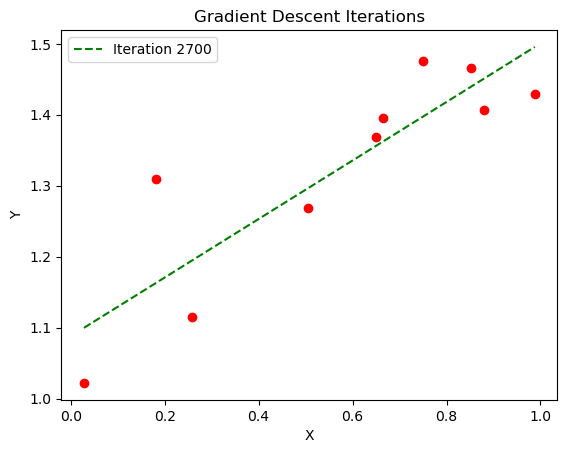

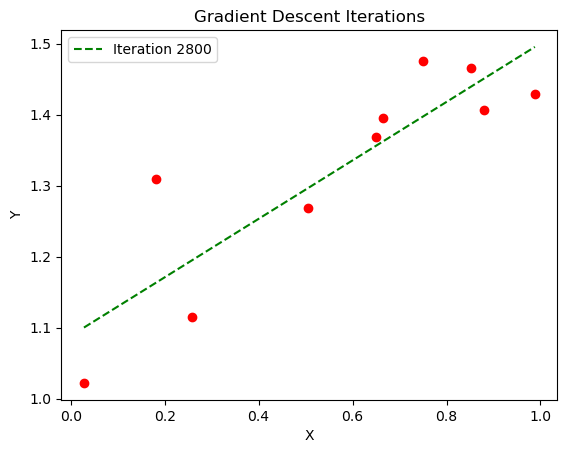

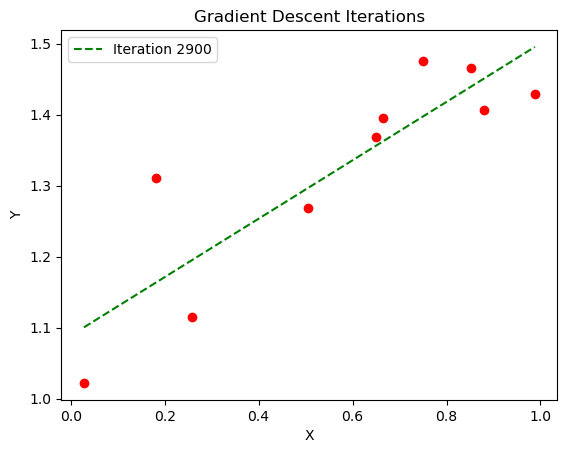

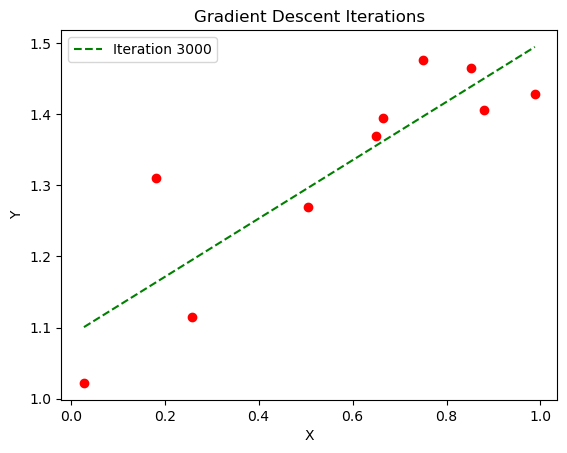

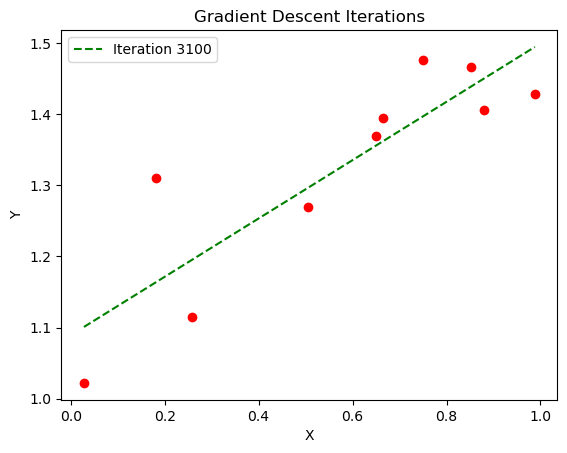

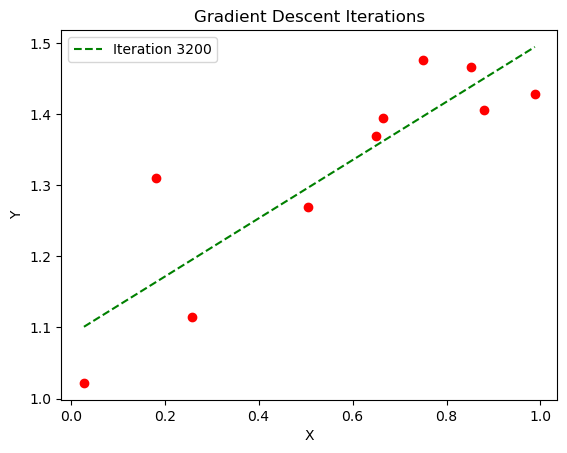

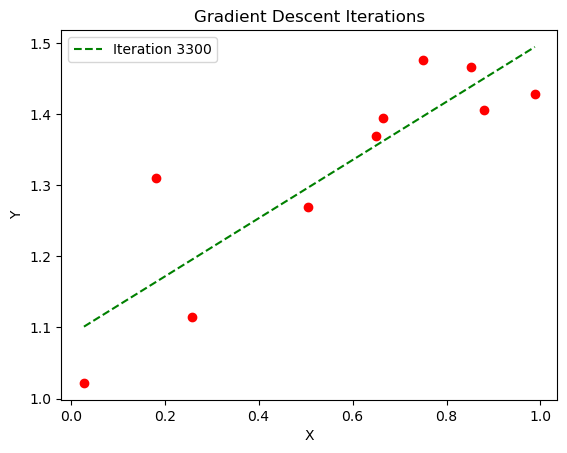

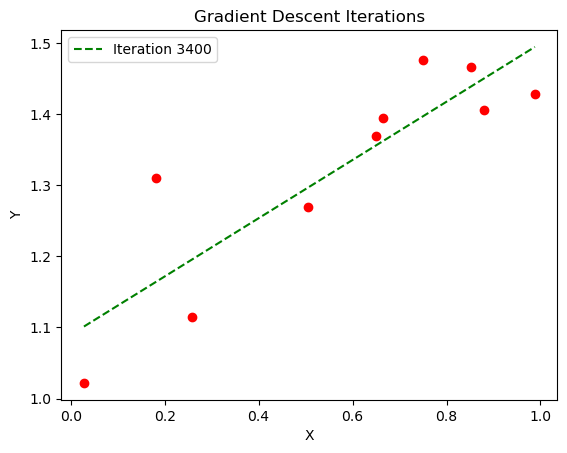

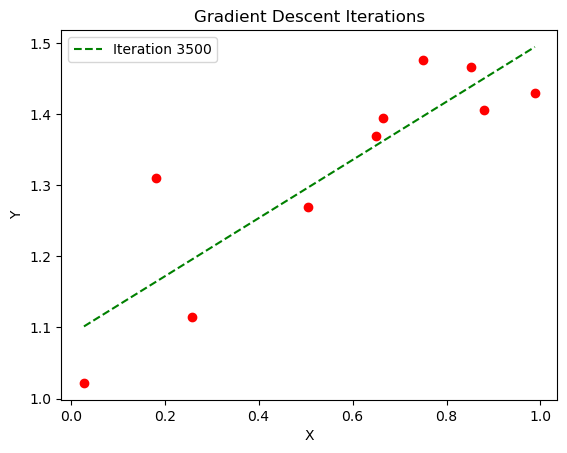

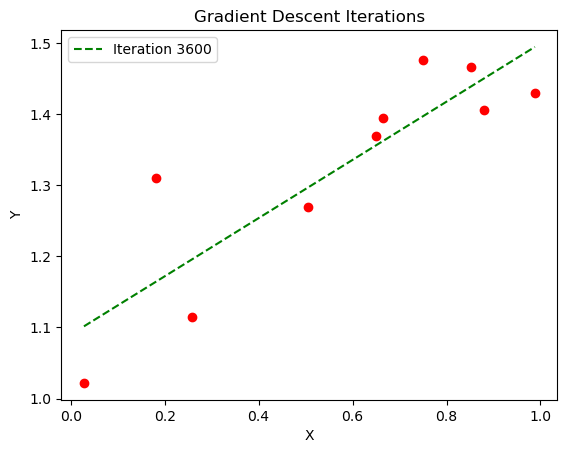

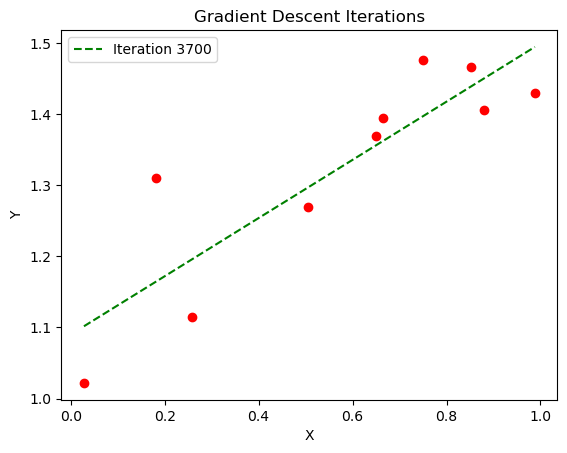

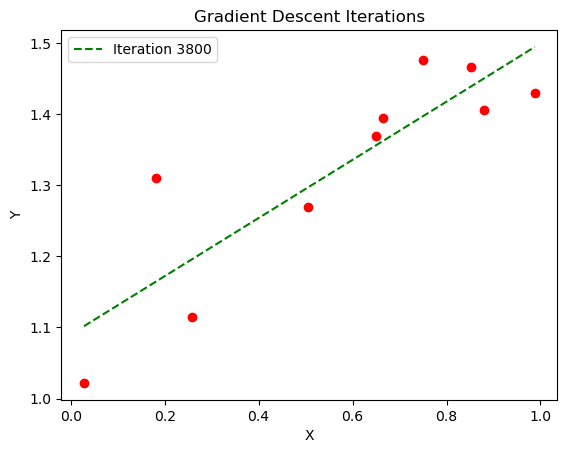

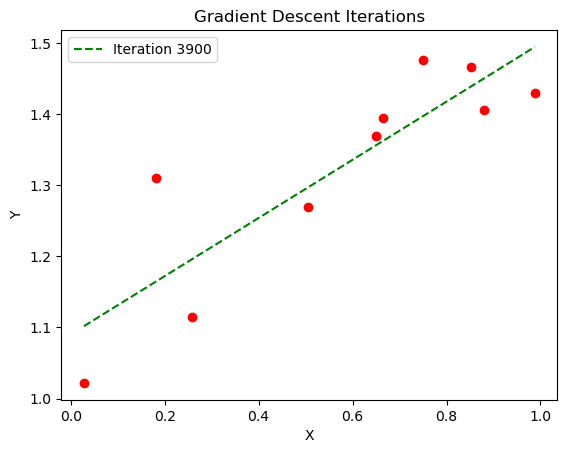

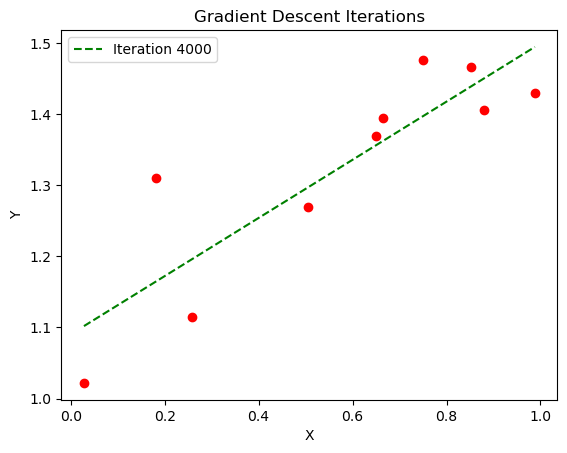

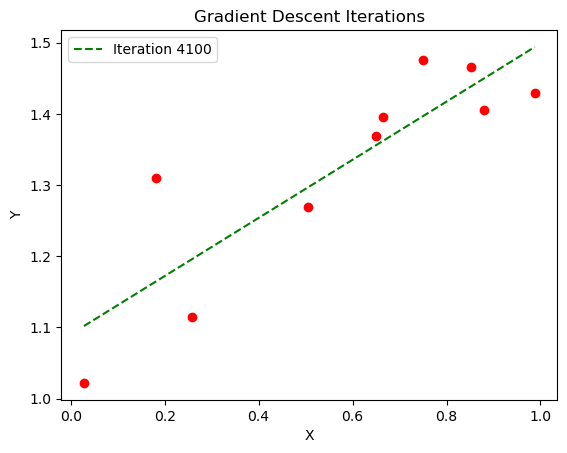

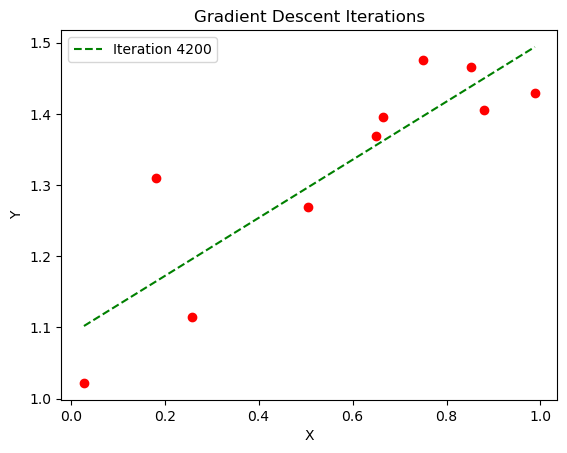

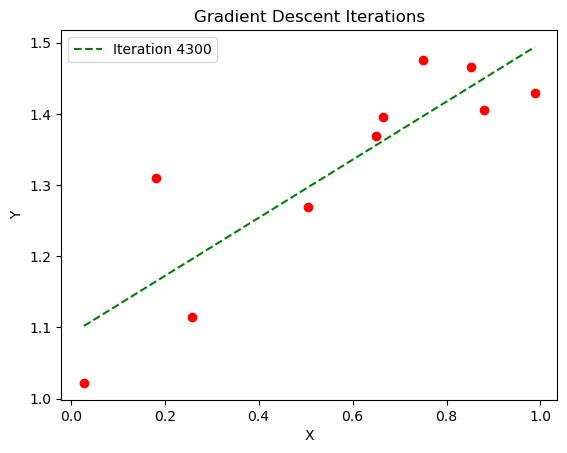

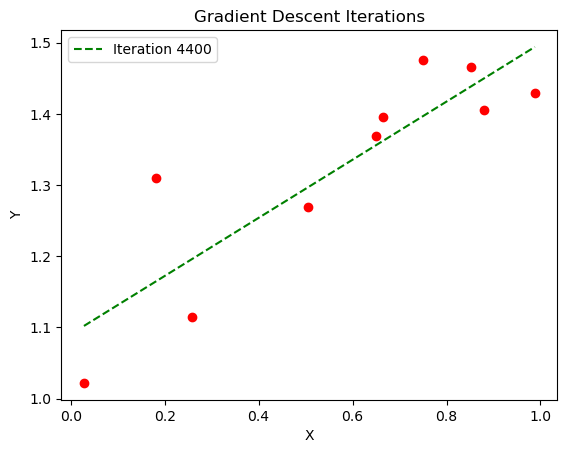

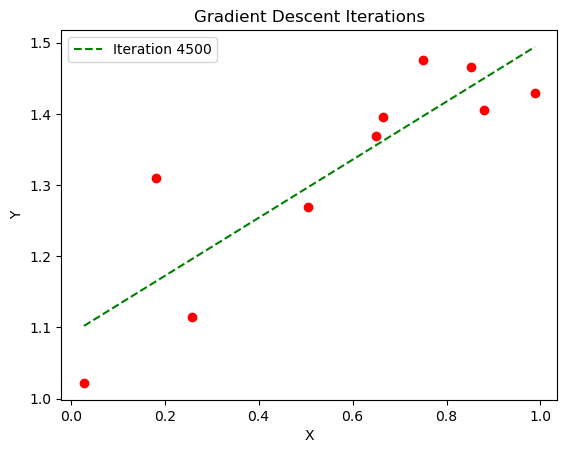

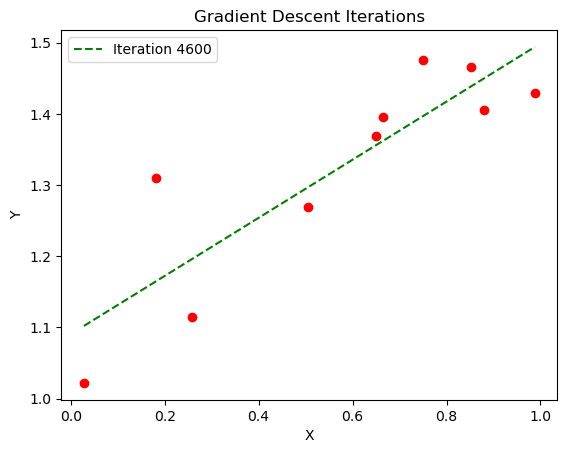

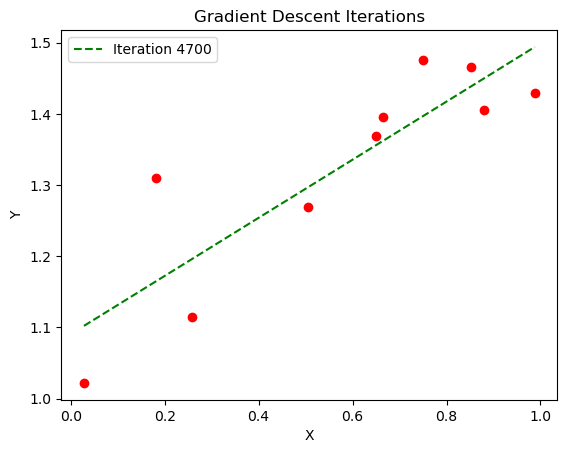

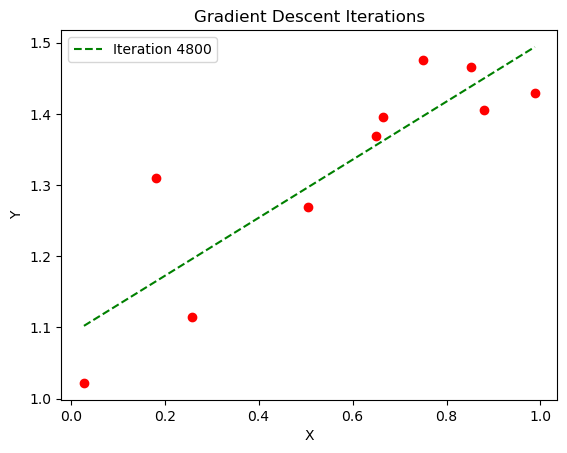

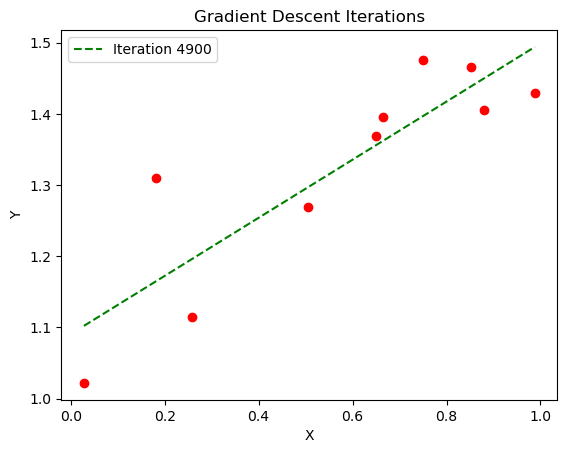

In [26]:
for i in range(0, 5000, 100):
    plt.scatter(X, Y, color = 'red')
    y_pred = w1_list[i] * X + w0_list[i]
    plt.plot(X, y_pred, label=f'Iteration {i}', color = 'green', linestyle = '--')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gradient Descent Iterations')
    plt.legend()
    plt.show()

In [27]:
print(f'w0 = {W0}, w1 = {W1}')

w0 = 1.090777134817086, w1 = 0.4081219750409243


In [28]:
print(f'MSE value: {mean_squared_error}')

MSE value: 0.004910758675047429
